# Undersøk korpus med metadata

Notebook for å undersøke korpus med metadata


In [1]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [2]:
def check_navn(navn, limit=2, remove='Ja Nei Unnskyld Ikke Ah Hmm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x}
    for w in remove:
        if w in r:
            del r[w]
    return r

# Select a list of books


In [3]:
bøker = nb.get_urn({'title':'%røde%rubin%', 'author':"mykl%",'year':1800, 'next':250, 'limit':30})

In [4]:
bøker

[[2008021404040, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995],
 [2008100104083, 'Mykle, Agnar', 'Sangen om den røde rubin', 1998],
 [2009033100094, 'Mykle, Agnar', 'Sangen om den røde rubin', 2002],
 [2015090129001, 'Mykle, Agnar', 'Sangen om den røde rubin', 1956],
 [2016020808126, 'Mykle, Agnar', 'Sangen om den røde rubin', 2000],
 [2009011504069, 'Mykle, Agnar', 'Sangen om den røde rubin', 2000],
 [2008111304085, 'Mykle, Agnar', 'Sangen om den røde rubin', 2001],
 [2008021104029, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995],
 [2007052404016, 'Mykle, Agnar', 'Sangen om den røde rubin', 1967]]

In [6]:
def book_count(u):
    import requests
    r = requests.get('https://api.nb.no/ngram/book_count', json={'urn':bøker[0][0]})
    return r.json()

In [ ]:
{u:nb.totals(u) for u in [u[0] for u in bøker]}

### Assign a select book to variable 'bok'

In [18]:
bok = [2008021104029, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995]

Compute the candidates for characters - anything starting with a capital letter that could be a person name or place name

In [19]:
bok_navn = nb.navn(bok)

Edit the names, remove some words

In [20]:
bok_navn = check_navn(bok_navn, 5)
print([x for x in bok_navn])

['Abrahamsen', 'Arbeiderbladet', 'Ask', 'Bill', 'Burlefot', 'Busserl', 'Constance', 'Constances', 'Dagbladet', 'Daniel', 'Daniels', 'Doffen', 'Doffens', 'Eirik', 'Embla', 'Fiffolo', 'Floden', 'Francis', 'Frankrike', 'Genossen', 'Gerda', 'Grand', 'Gud', 'Guds', 'Gunnhild', 'Hallo', 'Haydn', 'Hitler', 'Hm', 'Lenin', 'Maia', 'Marx', 'Molly', 'Norge', 'Oslo', 'Paris', 'Poppi', 'Robert', 'Roberts', 'Seeberg', 'Smith-Hermansen', 'Sosialistisk', 'Stabell', 'Stallen', 'Stravinsky', 'Studentersamfunnet', 'Studentersamfunnet.', 'Studentlag', 'Synnøve', 'Tananarivo', 'Taraldsen', 'Thea', 'Tyskland', 'Villsvinsen', 'Wilhelmine', 'Wolfgang', 'Økonomiske']


In [21]:
network = nb.make_network(bok, bok_navn)

In [30]:
nb.draw_graph_centrality??

True

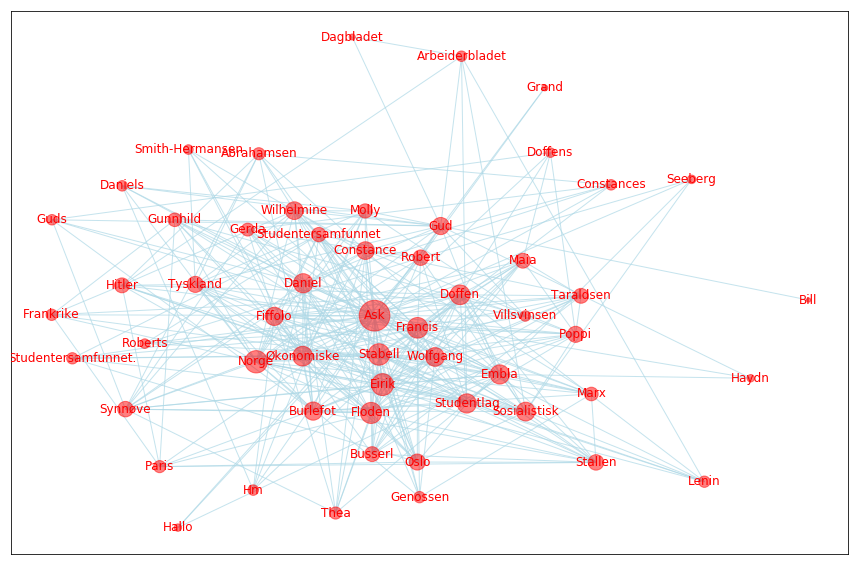

In [35]:
nb.draw_graph_centrality(network, k=2, fontsize=12, font_color="red")

In [23]:
nb.central_characters(network)

[('Ask', 0.9444444444444444),
 ('Norge', 0.5),
 ('Eirik', 0.48148148148148145),
 ('Stabell', 0.4629629629629629),
 ('Floden', 0.4444444444444444),
 ('Francis', 0.42592592592592593),
 ('Doffen', 0.38888888888888884),
 ('Økonomiske', 0.38888888888888884),
 ('Studentlag', 0.37037037037037035),
 ('Daniel', 0.37037037037037035)]

In [24]:
nb.central_betweenness_characters(network, n=len(network))

[('Ask', 0.3563396487440558),
 ('Gud', 0.08438709207269504),
 ('Norge', 0.04272278162477324),
 ('Embla', 0.029563666065010513),
 ('Daniel', 0.02528851268710899),
 ('Studentlag', 0.02376505823263183),
 ('Eirik', 0.02314328103795791),
 ('Stabell', 0.022526666787673073),
 ('Sosialistisk', 0.02147026682962332),
 ('Doffen', 0.020689228079165182),
 ('Floden', 0.019103155948019677),
 ('Økonomiske', 0.01876113472709043),
 ('Francis', 0.018728042378461665),
 ('Wilhelmine', 0.016492214114354302),
 ('Robert', 0.015870788653579646),
 ('Burlefot', 0.01317094108658232),
 ('Constance', 0.012476063419459647),
 ('Hitler', 0.011056872951299165),
 ('Fiffolo', 0.010514235841803976),
 ('Tyskland', 0.00892388243017174),
 ('Arbeiderbladet', 0.007825585393719563),
 ('Wolfgang', 0.007569429948884875),
 ('Gunnhild', 0.005477103066201598),
 ('Oslo', 0.004921658433188832),
 ('Molly', 0.0042936736105089034),
 ('Synnøve', 0.0040761513507844745),
 ('Poppi', 0.003605649874791247),
 ('Stallen', 0.0034614387863863747),